In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os

In [ ]:
from google.colab import files
f=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
data=pd.read_csv("diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [ ]:
y=data['Outcome']
x=data.drop('Outcome',axis=1)

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
data[data.Glucose==0].shape[0]

5

In [ ]:
data[data.BloodPressure==0].shape[0]

35

In [ ]:
data[data.SkinThickness==0].shape[0]

227

In [ ]:
data[data.Insulin==0].shape[0]

374

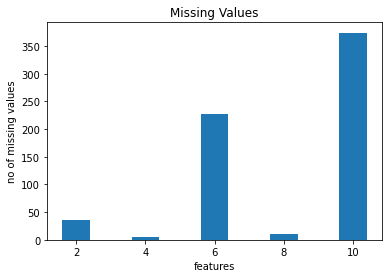

In [ ]:
x1=[2,4,6,8,10]
y1=[35,5,227,11,374]
plt.bar(x1,y1,label='missing values')
plt.xlabel("features")
plt.ylabel("no of missing values")
plt.title('Missing Values')
plt.show()

In [ ]:
import statistics
print(statistics.median(data['BloodPressure']))
print(statistics.median(data['Glucose']))
print(statistics.median(data['SkinThickness']))
print(statistics.median(data['BMI']))
print(statistics.median(data['Insulin']))

72.0
117.0
23.0
32.0
30.5


In [ ]:
data['BloodPressure']=data['BloodPressure'].replace(0,72)
data['Glucose']=data['Glucose'].replace(0,120.8945)
data['SkinThickness']=data['SkinThickness'].replace(0,23)
data['BMI']=data['BMI'].replace(0,32)
data['Insulin']=data['Insulin'].replace(0,30.5)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
x[col]=sc.fit_transform(data[col])
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


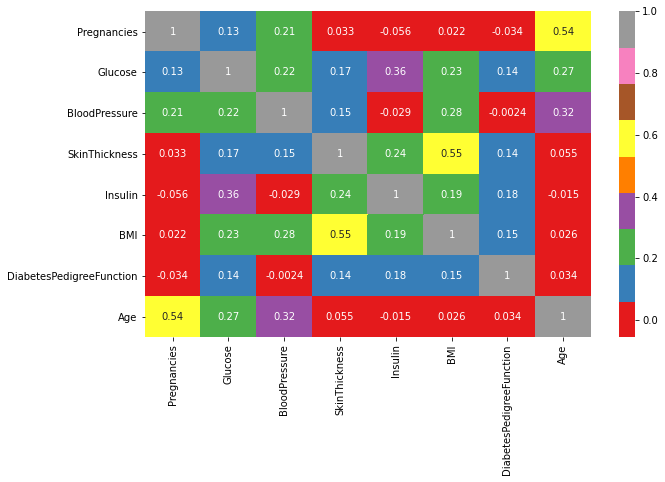

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(x.corr(),annot = True,cmap = 'Set1')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_LogReg=LogisticRegression(C=10.0)
model_dectree=DecisionTreeClassifier(random_state=1)
model_Rand=RandomForestClassifier()
model_Svc=SVC(C=10,probability=True)
model_knn=KNeighborsClassifier(n_neighbors=3)
model_NB=GaussianNB()

In [ ]:
model_LogReg.fit(xtrain, ytrain)
model_dectree.fit(xtrain, ytrain) 
model_Rand.fit(xtrain, ytrain) 
model_Svc.fit(xtrain, ytrain)
model_knn.fit(xtrain, ytrain) 
model_NB.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
ypred_LogReg=model_LogReg.predict(xtest)
ypred_dectree=model_dectree.predict(xtest)
ypred_Rand=model_Rand.predict(xtest)
ypred_Svc=model_Svc.predict(xtest)
ypred_knn=model_knn.predict(xtest)
ypred_NB=model_NB.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm_LogReg = confusion_matrix(ytest, ypred_LogReg)
cm_dectree = confusion_matrix(ytest, ypred_dectree)
cm_Rand = confusion_matrix(ytest, ypred_Rand)
cm_Svc = confusion_matrix(ytest, ypred_Svc)
cm_knn = confusion_matrix(ytest, ypred_knn)
cm_NB = confusion_matrix(ytest, ypred_NB)

cr_LogReg = classification_report(ytest, ypred_LogReg)
cr_dectree = classification_report(ytest, ypred_dectree)
cr_Rand = classification_report(ytest, ypred_Rand)
cr_Svc = classification_report(ytest, ypred_Svc)
cr_knn = classification_report(ytest, ypred_knn)
cr_NB = classification_report(ytest, ypred_NB)

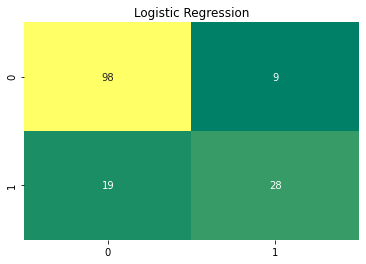

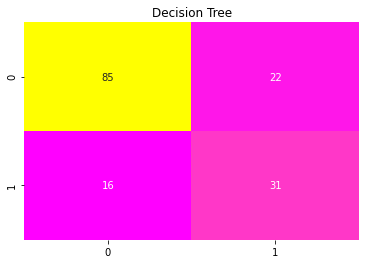

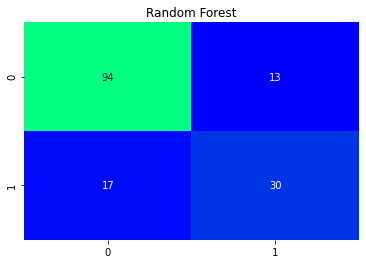

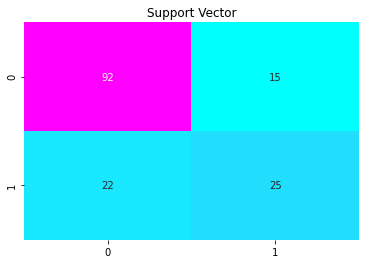

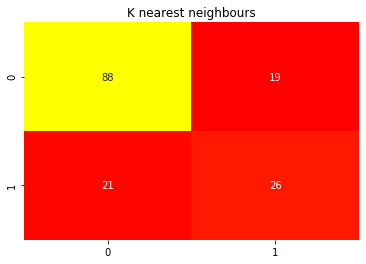

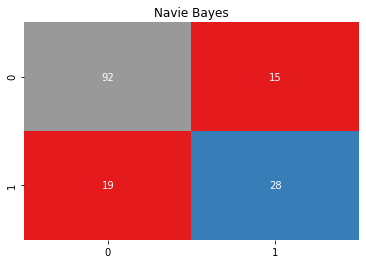

In [ ]:
sns.heatmap(cm_LogReg,annot=True,cbar=None,cmap = 'summer')
plt.title('Logistic Regression')
plt.show()
sns.heatmap(cm_dectree,annot=True,cbar=None,cmap = 'spring')
plt.title('Decision Tree')
plt.show()
sns.heatmap(cm_Rand,annot=True,cbar=None,cmap = 'winter')
plt.title('Random Forest')
plt.show()
sns.heatmap(cm_Svc,annot=True,cbar=None,cmap = 'cool')
plt.title('Support Vector')
plt.show()
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'autumn')
plt.title('K nearest neighbours')
plt.show()
sns.heatmap(cm_NB,annot=True,cbar=None,cmap = 'Set1')
plt.title('Navie Bayes')
plt.show()

In [ ]:
print('Classification report Log Reg',cr_LogReg)
print('Classification report Dec Tree',cr_dectree)
print('Classification report Rand Forest',cr_Rand)
print('Classification report Support Vector',cr_Svc)
print('Classification report Kn neighbours',cr_knn)
print('Classification report Naive Bayes',cr_NB)

Classification report Log Reg               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Classification report Dec Tree               precision    recall  f1-score   support

           0       0.84      0.79      0.82       107
           1       0.58      0.66      0.62        47

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.76      0.75      0.76       154

Classification report Rand Forest               precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76

In [ ]:
from sklearn.metrics import f1_score
print('f1_score of Log Reg',f1_score(ytest,ypred_LogReg))
print('f1_score of Dec Tree',f1_score(ytest,ypred_dectree))
print('f1_score of Rand Forest',f1_score(ytest,ypred_Rand))
print('f1_score of Support Vector',f1_score(ytest,ypred_Svc))
print('f1_score of Kn neighbour',f1_score(ytest,ypred_knn))
print('f1_score of Naive Bayes',f1_score(ytest,ypred_NB))


f1_score of Log Reg 0.6666666666666666
f1_score of Dec Tree 0.62
f1_score of Rand Forest 0.6666666666666666
f1_score of Support Vector 0.5747126436781609
f1_score of Kn neighbour 0.5652173913043478
f1_score of Naive Bayes 0.6222222222222222


In [ ]:
from sklearn.model_selection import GridSearchCV
clf=LogisticRegression(random_state=100)
parameters={'C':[1,10,100,0.1],'penalty':['l2'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridObj=GridSearchCV(clf,parameters)
grid_LogReg=gridObj.fit(xtrain,ytrain)
print('best parameters ',grid_LogReg.best_estimator_)
best_est=grid_LogReg.best_estimator_
best_pred=grid_LogReg.predict(xtest)
cr_best=classification_report(ytest,best_pred)

best parameters  LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
print(cr_best)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [ ]:
print('f1_score of best Log Reg',f1_score(ytest,best_pred))

f1_score of best Log Reg 0.6666666666666666


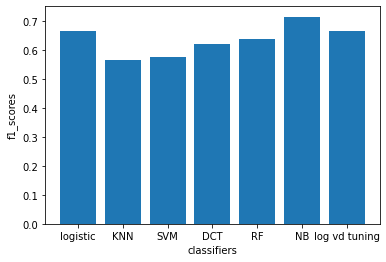

In [ ]:
lab=["logistic","KNN","SVM","DCT","RF","NB","log vd tuning"]
f1scores=[0.6666666666666666,0.5652173913043478,0.5747126436781609,0.62,0.6363636363636364,0.7142857142857144,
          0.6666666666666666]
plt.bar(lab,f1scores)
plt.xlabel("classifiers")
plt.ylabel("f1_scores")
plt.show()